In [1]:
import os
import numpy as np

In [2]:
data_path = 'F:/GTSDB/small_img/'

In [3]:
dir_list = os.listdir(data_path)

In [4]:
dic = dict()
index = 0
for _dir in dir_list:
    dic[index] = []
    for root, dirs, files in os.walk(data_path + _dir + '/'):
        dic[index].append(files)
    index += 1

In [5]:
for i in dic:
    print(i, len(dic[i][0]))

0 4
1 79
2 81
3 30
4 68
5 53
6 19
7 41
8 57
9 41
10 80
11 38
12 85
13 83
14 32
15 15
16 8
17 29
18 38
19 2
20 9
21 5
22 13
23 20
24 5
25 31
26 18
27 3
28 14
29 5
30 16
31 2
32 8
33 16
34 12
35 20
36 9
37 2
38 88
39 6
40 10
41 7
42 11


In [6]:
import numpy as np

def isOverlap(img1, img2, tolerance):
    inter_upleft    = np.maximum(img1[:2], img2[:2])
    inter_botright  = np.minimum(img1[2:], img2[2:])

    inter_wh = inter_botright - inter_upleft
    inter_wh = np.maximum(inter_wh, 0)
    inter = inter_wh[0] * inter_wh[1]

    if inter == 0:
        return True, 0

    area_1 = (img1[2] - img1[0]) * (img1[3] - img1[1])
    area_2 = (img2[2] - img2[0]) * (img2[3] - img2[1])

    # iou = inter / (area_1 + area_2 - inter)

    tol_to_1 = inter / area_1
    tol_to_2 = inter / area_2

    if tol_to_1 > tolerance or tol_to_2 > tolerance:
        return False, inter

    return True, 0

['42/00004.ppm', '26/00008.ppm', '03/00003.ppm', '36/00005.ppm', '40/00007.ppm']
(52, 52, 126, 23) (126, 23, 178, 75)
(37, 32, 235, 250) (235, 250, 272, 282)
(36, 38, 73, -18) (73, 0, 109, 20)
(69, 69, 81, 69) (81, 69, 150, 138)
(35, 37, 268, 124) (268, 124, 300, 161)


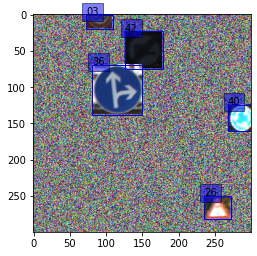

[[(126, 23, 178, 75), '42'], [(235, 250, 272, 282), '26'], [(73, 0, 109, 20), '03'], [(81, 69, 150, 138), '36'], [(268, 124, 300, 161), '40']]


In [39]:
import random

part_number = random.randrange(1, 6)

smallImageList = []

for i in range(part_number):
    select_index = random.randrange(43)
    part_len = len(dic[select_index][0])
    part_select = random.randrange(part_len)
    smallImageList.append(str(select_index if select_index > 9 else '0' + str(select_index)) + '/' + dic[select_index][0][part_select])

print(smallImageList)


import matplotlib.pyplot as plt
from PIL import Image

img = Image.new('RGB', (300, 300))
for x in range(300):
    for y in range(300):
        img.putpixel((x, y), (random.randrange(0, 255),random.randrange(0, 255),random.randrange(0, 255)))

l = []

for smallImage in smallImageList:
    tImg = Image.open(data_path + smallImage)
    resize = random.uniform(1.0, 1.5)
    w, h = (int(tImg.width * resize), int(tImg.height * resize))
    tImg = tImg.resize((w, h))
    x, y = (random.randrange(-20,280), random.randrange(-20,280))
    img.paste(tImg, (x, y))

    leftCol = x if x > 0 else 0
    topRow = y if y > 0 else 0
    rightCol = (x + w) if (x + w) < 300 else 300
    bottomRow = (y + h) if (y + h) < 300 else 300

    position =(leftCol, topRow, rightCol, bottomRow)
    l.append([position, smallImage[:2]])
    print((w, h, x, y), position)

# plt.imshow(img)


plt.imshow(img)

for tar in l:
    ax = plt.gca()
    ax.add_patch(plt.Rectangle((tar[0][0], tar[0][1]), tar[0][2] - tar[0][0], tar[0][3] - tar[0][1], color="blue", fill=False, linewidth=1))
    ax.text(tar[0][0], tar[0][1], tar[1], bbox={'facecolor':'blue', 'alpha':0.5})

plt.show()
print(l)

for a in range(len(l)):
    for b in range(a + 1, len(l)):
        over = isOverlap(l[a][0], l[b][0], 0.1)
        if not over[0]:
            print(l[a], l[b], over)


In [1]:
import matplotlib.pyplot as plt
from create_dataset import create_dataset

t = create_dataset()

[[(131, 258, 208, 300), '27'], [(89, 213, 126, 245), '19'], [(149, 180, 188, 218), '00'], [(183, 94, 230, 136), '22']]


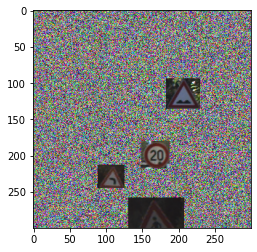

In [2]:
g = t.generate()
plt.imshow(g[0])
print(g[1])

In [4]:
t.create(200)

Done!


True